<a href="https://colab.research.google.com/github/Skub123/Access-to-Loan-Dataset/blob/master/dataset%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```


```
## Shubham Karnwal (18bcs6129)
```

```



# Import Libaries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from google.colab import files
warnings.filterwarnings('ignore')


## Upload Dataset

In [28]:
uploaded = files.upload()
  

Saving A5.csv to A5 (1).csv


# **Read Csv File**

In [69]:
df=pd.read_csv("A5 (1).csv")

In [70]:
df.head()

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [71]:
df.dtypes

CGPA                float64
Chance of Admit     float64
dtype: object

In [72]:
df.shape

(298, 2)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CGPA              298 non-null    float64
 1   Chance of Admit   298 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


# Check Missing Value

In [74]:
df.isnull().sum()

CGPA                0
Chance of Admit     0
dtype: int64

No Missing Value

In [75]:
df[(np.abs(stats.zscore(df)) <3 ).all(axis=1)]

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65
...,...,...
293,8.18,0.64
294,8.32,0.61
295,8.57,0.68
296,8.67,0.76


#Data Visualization

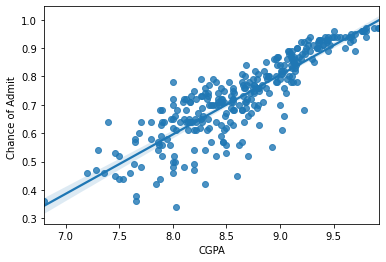

In [76]:
#Plotting and visualising the data
import seaborn as sns
#This function scatter plots of x,y and fits a regression line for y and x
sns.regplot(x="CGPA", y='Chance of Admit ', data=df);

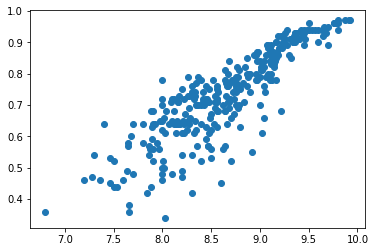

In [77]:
x = df['CGPA']
y = df['Chance of Admit ']
plt.scatter(x,y)
plt.show()

#  Data Pre-Processing

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
transform = ['CGPA','Chance of Admit ']
df[transform]=sc.fit_transform(df[transform])

# Model Building

In [79]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
 

In [80]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(train_x)

In [81]:
lr=sm.OLS(train_y,X_train_sm).fit()

lr.params

print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     700.2
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.42e-68
Time:                        07:07:26   Log-Likelihood:                 162.30
No. Observations:                 208   AIC:                            -320.6
Df Residuals:                     206   BIC:                            -313.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.025     -0.030      0.9

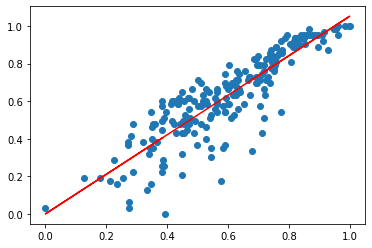

In [82]:
plt.scatter(train_x,train_y)
plt.plot(train_x,-0.0008+1.0530*train_x,'r')
plt.show()

In [83]:
y_train_pred = lr.predict(X_train_sm)
res = (train_y - y_train_pred)

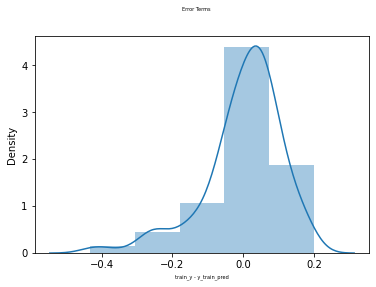

In [84]:
fig = plt.figure()
sns.distplot(res, bins = 5)
fig.suptitle('Error Terms', fontsize = 5) 
plt.xlabel('train_y - y_train_pred', fontsize = 5) 
plt.show()


#model Evaluation

In [85]:
X_test_sm = sm.add_constant(test_x)

y_pred = lr.predict(X_test_sm)


In [86]:
y_pred.head()


220    0.657390
139    0.782268
223    0.556137
175    0.697891
229    0.745142
dtype: float64

In [87]:
from sklearn.metrics import r2_score
r_squared = r2_score(test_y, y_pred)
r_squared


0.6828897810347657